In [1]:
from scipy.io import wavfile
import numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd

import random
import string
from Crypto.Cipher import AES

In [2]:
from scipy.io.wavfile import write

fs = 44100  # Sample rate
seconds = 5  # Duration of recording

myrecording = sd.rec(int(seconds * fs), samplerate=fs, channels=2)
sd.wait()  # Wait until recording is finished
write('output.wav', fs, myrecording)  # Save as WAV file

Text(0.5, 1.0, 'Original Audio Plot')

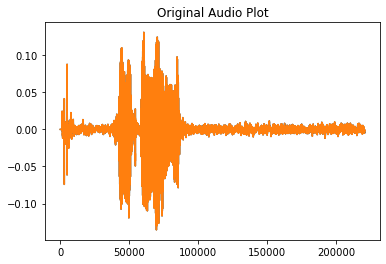

In [3]:
fs, data = wavfile.read('output.wav')
plt.plot(data)            # fs = sampling frequency = 44.1kHz
plt.title("Original Audio Plot")

In [4]:
sd.play(data, fs)

In [5]:
with open('output.wav', 'rb') as fd:
    contents = fd.read()

### Getting ready with AES

In [6]:
AES_KEY = ''.join(random.choice(string.ascii_uppercase + string.ascii_lowercase + string.digits) for x in range(32))

AES_IV = ''.join(random.choice(string.ascii_uppercase + string.ascii_lowercase + string.digits) for x in range(16))

In [7]:
print("AES Key is ", AES_KEY)
print("AES Initialization vector is ", AES_IV)

AES Key is  8JfPsYGHHXSj5iSnRyL4ocdzvf5dX3E2
AES Initialization vector is  8sQdy2vWw9sBQ4AU


### Encrpytion of audio file

In [9]:
encryptor = AES.new(AES_KEY.encode("utf-8"), AES.MODE_CFB, AES_IV.encode("utf-8"))
encrypted_audio = encryptor.encrypt(contents)

### Saving the encrypted file

In [10]:
with open('encrypted_AES.wav', 'wb') as fd:
    fd.write(encrypted_audio)
print("A file titled 'encrypted_AES.wav' is generated which is the encrypted audio to be communicated")

A file titled 'encrypted_AES.wav' is generated which is the encrypted audio to be communicated


In [11]:
with open('encrypted_AES.wav', 'rb') as fd:
    contents = fd.read()

### Decryption of data

In [12]:
decryptor = AES.new(AES_KEY.encode("utf-8"), AES.MODE_CFB, AES_IV.encode("utf-8"))
decrypted_audio = decryptor.decrypt(contents)

In [13]:
with open('decrypted_AES.wav', 'wb') as fd:
    fd.write(decrypted_audio)

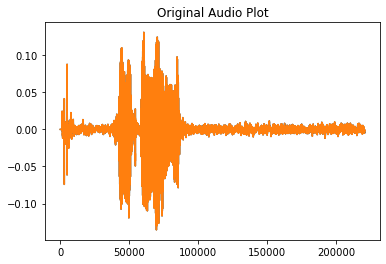

In [14]:
fs, decrypted = wavfile.read('decrypted_AES.wav')
plt.plot(decrypted)            # fs = sampling frequency = 44.1kHz
plt.title("Original Audio Plot")
data_1 = np.asarray(decrypted, dtype = np.int32)

In [15]:
sd.play(decrypted, fs)